## DBSCAN (density-based spatial clustering of applications with noise)

1. Input Parameters
* Minimum Points (minPts): The minimum number of points required to form a dense region.
  - General Rule of Thumb: minPts ≥ Dimensions + 1
* Epsilon ($\varepsilon$): The radius that defines the neighborhood of a data point.
  - The k-distance plot is a popular method to determine ε. Steps:
    - For each point in the dataset, compute the distance to its $k$-th nearest neighbor, where  $k$ = minPts − 1.
    - Sort the distances in descending order.
    - Plot the sorted distances.
    - Look for the "elbow" (a point where the slope changes significantly). This point indicates a good $\varepsilon$ value.

2. Classify Points
Each data point is classified into one of three categories:

* Core Point: A point that has at least minPts points (including itself) within its $\varepsilon$ radius.
* Border Point: A point that is not a core point but lies within the $\varepsilon$ radius of a core point.
* Noise (Outlier): A point that is neither a core nor a border point.

3. Clustering Process
* Visit each point in the dataset:
  - If the point has already been visited, skip it.
  - Otherwise, check its $\varepsilon$-neighborhood.
   
* Core Point Handling:
  - If the point is a core point, start a new cluster.
  - Include all points in its ε-neighborhood in the cluster.
  - Recursively expand the cluster by checking the ε-neighborhood of all new core points in the cluster.
    
* Border Point Handling:
  - If the point is a border point, assign it to the cluster of the core point it is connected to.
  - Do not expand the cluster further from border points.
* Noise Handling:
  - If the point does not meet the minPts requirement and is not within the ε radius of any core point, label it as noise.

4. Stop Condition
* The algorithm stops when all points in the dataset have been visited.


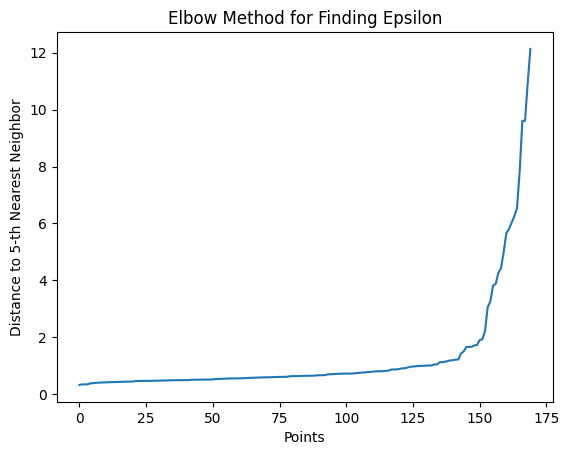

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def find_epsilon(data, min_points):
    # Compute k-nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=min_points)
    neighbors_fit = neighbors.fit(data)
    
    distances, indices = neighbors_fit.kneighbors(data)

    # Sort distances to the kth nearest neighbor
    sorted_distances = np.sort(distances[:, min_points - 1])
    
    # Plot the distances
    plt.plot(sorted_distances)
    plt.xlabel("Points")
    plt.ylabel(f"Distance to {min_points}-th Nearest Neighbor")
    plt.title("Elbow Method for Finding Epsilon")
    plt.show()

# Generate random data with clusters
# np.random.seed(42)
cluster_1 = np.random.normal(loc=[5, 5], scale=1, size=(50, 2))
cluster_2 = np.random.normal(loc=[15, 15], scale=1, size=(50, 2))
cluster_3 = np.random.normal(loc=[25, 5], scale=1, size=(50, 2))
noise = np.random.uniform(low=0, high=30, size=(20, 2))

data = np.vstack([cluster_1, cluster_2, cluster_3, noise])
min_points = 5
find_epsilon(data, min_points)
epsilon = 2

In [38]:
import numpy as np
from collections import deque

def dbscan(data, epsilon, min_points):
    
    # Initialize labels (-1 for noise, 0 for unvisited)
    labels = np.zeros(data.shape[0], dtype=int)
    cluster_id = 0

    def get_neighbors(point_idx):
        #Find indices of all neighbors within epsilon of a given point
        neighbors = []
        for i in range(data.shape[0]):
            if np.linalg.norm(data[point_idx] - data[i]) <= epsilon:
                neighbors.append(i)
        return neighbors

    for point_idx in range(data.shape[0]):
        if labels[point_idx] != 0:  # Skip visited points
            continue

        # Get neighbors of the point
        neighbors = get_neighbors(point_idx)

        # Check if it's a core point, if it has less than the min points for the neigbors, then it is a noise
        if len(neighbors) < min_points:
            labels[point_idx] = -1  # Mark as noise
        else:
            # Expand cluster
            cluster_id += 1
            labels[point_idx] = cluster_id
            queue = deque(neighbors)

            while queue:
                neighbor_idx = queue.popleft()
                
                if labels[neighbor_idx] == -1:  # Change noise to border point
                    labels[neighbor_idx] = cluster_id
                
                if labels[neighbor_idx] == 0:  # Expand unvisited points
                    labels[neighbor_idx] = cluster_id
                    new_neighbors = get_neighbors(neighbor_idx)
                    if len(new_neighbors) >= min_points:
                        queue.extend(new_neighbors)

    return labels

Cluster labels: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3 -1 -1  1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
 -1 -1]


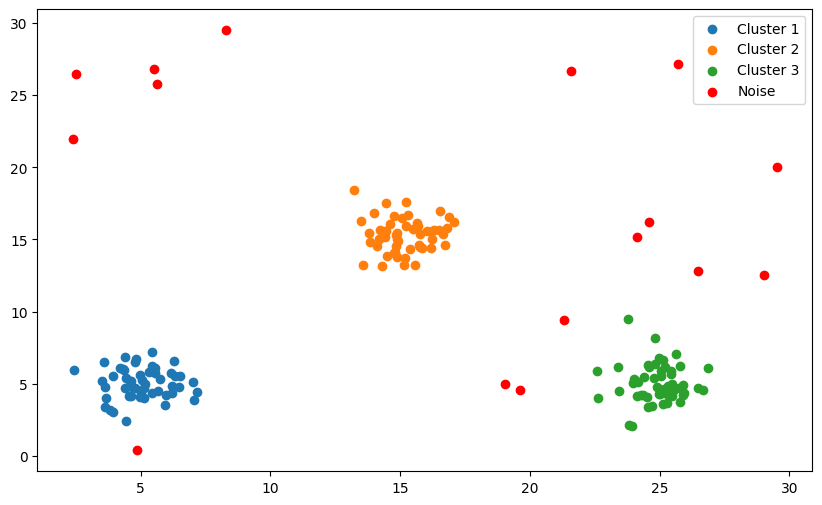

In [39]:
# Parameters
labels = dbscan(data, epsilon, min_points)
print("Cluster labels:", labels)

# Visualize the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
def plot_clusters(data, labels):
    unique_labels = set(labels)
    for label in unique_labels:
        cluster_points = data[labels == label]
        if label == -1:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='red', label="Noise")
        else:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label}")
    plt.legend()
    plt.show()

plot_clusters(data, np.array(labels))